# Exercise 2

In [5]:
# Setup
%matplotlib inline

import pandas as pd
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt
import seaborn as sns

## Section 2.5

### Basic Data Setup

In [3]:
# Data Setup
def gen_data(N=40):
    x = np.random.uniform(low=0., high=1., size=N)
    y = x ** 2 + np.random.standard_normal(size=N)
    
    return x, y, pr.gendatr(x[:, None], y[:, None])

#### PR Dataset

In [4]:
x, y, dataset = gen_data()

<AxesSubplot:>

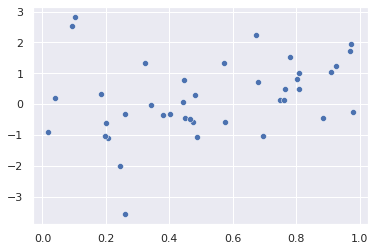

In [5]:
sns.set_theme()
sns.scatterplot(x=x, y=y)

### Lets see some regression plots for $N = 40$

In [6]:
y_hats = [pr.linearr(dataset, i) for i in range(0, 4)]

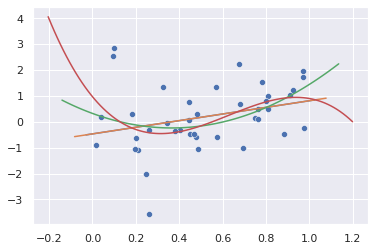

In [7]:
sns.scatterplot(x=x, y=y)
[pr.plotr(y_hats[i]) for i in range(0, len(y_hats))];

### Lets see some regression plots for $N = 400$

In [8]:
# Data Setup
x, y, dataset = gen_data(N=400)

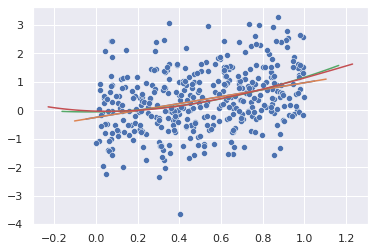

In [9]:
y_hats = [pr.linearr(dataset, i) for i in range(0, 4)]
sns.scatterplot(x=x, y=y)
[pr.plotr(y_hats[i]) for i in range(0, len(y_hats))];

As the size of the dataset increases the variance in the classifier reduces as well and it shows high bias instead. Basically it is now underfitting where as previously when $N = 40$ it was overfitting in higher degree classifiers.

## Section 2.7

Doing optionals at the end

In [2]:
def gendat_27(N=100):
    x = np.random.standard_normal(size=(N, 2))
    y = 50 * np.sin(x[:, 0]) * np.sin(x[:, 1]) + np.random.standard_normal(size=N)
    return x, y, pr.prdataset(x, targets=y)

In [24]:
x, y, dataset27 = gendat_27(N=10000)

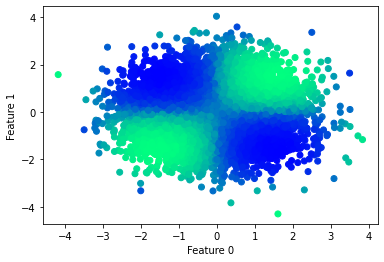

In [25]:
pr.scatterd(dataset27)

In [26]:
x_test, y_test, testset27 = gendat_27(N=1000)

In [27]:
w1 = pr.linearr(dataset27, 1)
testset27 * w1 * pr.testr()

486.84330360177825

In [28]:
w2 = pr.linearr(dataset27, 2)
testset27 * w2 * pr.testr()

487.22425457003555

### Now for more higher degree polys

Notice how the error doesn't reduce but goes up instead not sure why this happens though

In [29]:
[testset27 * pr.linearr(dataset27, i) * pr.testr() for i in range(0, 11)]

[486.84330360177825,
 486.84330360177825,
 487.22425457003555,
 487.1181647574424,
 487.45403173526876,
 487.60985475863015,
 487.47662825746403,
 486.47321536152106,
 488.95175347318326,
 489.51141072864726,
 491.29420809145705]

In [32]:
# same as doing x[:, 0] * x[:, 1]
y_test = np.prod(x_test, axis=1)

In [33]:
testset27 = pr.prdataset(x_test, targets=y_test)

In [35]:
y_hats27 = [pr.linearr(dataset27, i) for i in range(0, 11)]
[testset27 * y_hats27[i] * pr.testr() for i in range(0, len(y_hats27))]

[1.2663258512483053,
 1.2663258512483053,
 1.4174637898012714,
 1.4863380510447795,
 2.5167965081385417,
 2.365643087939121,
 2.707475930257128,
 2.6395394048148955,
 8.812038643136544,
 11.063988885016034,
 13.87743757296581]

## Section 2.7 The Perceptron

### Exercise 2.15 (a)

In [179]:
dataset = pr.gendats([20,20],2,6)

In [180]:
x = +dataset
y = dataset.targets

In [181]:
x_n = np.append(x, np.ones([len(x),1]),1)

In [182]:
n, m = x_n.shape
n, m
# n inputs and m dimensions

(40, 3)

In [183]:
y.shape

(40, 1)

In [184]:
weights = np.random.randn(m, y.shape[1])

In [185]:
weights.shape

(3, 1)

In [186]:
np.dot(x_n, weights).shape

(40, 1)

In [191]:
def perceptron_trainer(W, inp, y, bias=1, alpha=.01, rounds=10):
    for i in range(rounds):
        n, m = inp.shape
        activation = inp @ W # + bias # activation basically with no activation function for non-linearisation
        y_hat = np.where(activation > .0, 1., 0.)
        
        update = alpha * (y - y_hat) * inp
        for u in update:
            W += u[:, None]
#             bias += alpha * (y - y_hat)
    
    return {'w': W, 'b': bias} #np.sum(bias)/len(bias)
        

In [192]:
params = perceptron_trainer(weights, x_n, y)

In [193]:
w = params['w']
b = params['b']

In [194]:
w, b

(array([[ 0.9831165 ],
        [ 0.24627451],
        [-3.23116879]]),
 1)

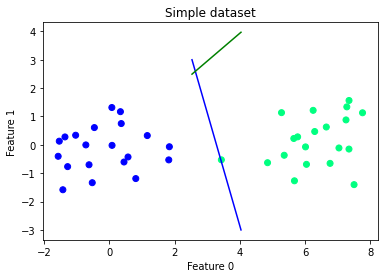

In [195]:
pr.scatterd(dataset)
x2 = [-3, 3]
x1 = -(x2 * w[1] + w[2]) / w[0]
x12 = -(x2 * w[1] + w[2])
plt.plot(x1, x2, 'b')
plt.plot(x1, x12,'g')

In [177]:
a = np.array([1,2])

In [4]:
a[:, None].shape

(2, 1)

In [197]:
W = np.random.randn(m, y.shape[1])

params = perceptron_trainer(W, x, y, bias=1)

In [198]:
params['w']

array([[-62.75932218],
       [  1.52205558]])

In [195]:
params['b']

0.3549999999999998